In [73]:
from scipy.stats import pearsonr
import numpy as np
import pandas as pd
# list to store the generated random numbers
lcg_random_number = []

# Linear Congruential Generator (LCG)

In [43]:
def lcg_random(seed, modulus=2**32, a=1664525, c=1013904223):
    # Linear Congruential Generator (LCG) formula: X_{n+1} = (a * X_n + c) % m
    # This generates a sequence of pseudo-random numbers
    seed = (a * seed + c) % modulus
    return (seed) 


def generate_random_number_lcg(rand_num):
    if (rand_num % 3) == 0:
        lcg_random_number.append(rand_num % 3)
    elif (rand_num % 3) == 1:
        lcg_random_number.append(rand_num % 3)
    elif (rand_num % 3) == 2:
        lcg_random_number.append(rand_num % 3)
    print (f"Random value: {rand_num}")
    print (f"Randomly selected number: {rand_num % 3}")

In [44]:
new_rand_val_lcg = lcg_random(seed = 12587)

In [45]:
for i in range(100):
    new_rand_val_lcg = lcg_random(new_rand_val_lcg)
    generate_random_number_lcg(new_rand_val_lcg)
    

Random value: 4152627861
Randomly selected number: 0
Random value: 1041777392
Randomly selected number: 2
Random value: 2546334095
Randomly selected number: 2
Random value: 836934050
Randomly selected number: 2
Random value: 251219097
Randomly selected number: 0
Random value: 3465399588
Randomly selected number: 0
Random value: 1105376819
Randomly selected number: 2
Random value: 3028649462
Randomly selected number: 2
Random value: 2946286813
Randomly selected number: 1
Random value: 3614048408
Randomly selected number: 2
Random value: 2011532055
Randomly selected number: 0
Random value: 1572941194
Randomly selected number: 1
Random value: 1776107361
Randomly selected number: 0
Random value: 4100247884
Randomly selected number: 2
Random value: 1096670267
Randomly selected number: 2
Random value: 1974838366
Randomly selected number: 1
Random value: 2740174885
Randomly selected number: 1
Random value: 2849731392
Randomly selected number: 0
Random value: 2378124703
Randomly selected numbe

## Multiple Recursive Generator (MRG)

In [46]:
# creating a list to store the generated random numbers by MRG method
mrg_random_number = []
seed_list_global = []

In [47]:
def mrg_random(seed_list, modulus=2**32, coefficients=[1664525, 1013904223, 1287, 124877]):
    # Multiple Recursive Generator (MRG) formula: 
    # X_{n+1} = (a1 * X_{n} + a2 * X_{n-1} + ... + ak * X_{n-k+1}) % m
    if len(seed_list) != len(coefficients):
        raise ValueError("Length of seed_list and coefficients must match")

    new_seed = sum(a * x for a, x in zip(coefficients, seed_list)) % modulus
    
    # Update seed list to hold the latest values
    seed_list = seed_list[1:] + [new_seed]
    
    return new_seed, seed_list  # Return the new seed and updated seed list

def generate_random_number_mrg(rand_num):
    if (rand_num % 3) == 0:
        mrg_random_number.append(rand_num % 3)
    elif (rand_num % 3) == 1:
        mrg_random_number.append(rand_num % 3)
    else:
        mrg_random_number.append(rand_num % 3)
    #print (f"Random value: {rand_num}")
    #print (f"Randomly selected number: {rand_num % 3}")

#### Selected prime numbers

In [48]:
selected_prime = [11997, 4001, 1011, 1999]
print (f"Selected set of prime number are: {selected_prime}")

Selected set of prime number are: [11997, 4001, 1011, 1999]


#### Getting the permutations of the selected prime numbers

In [49]:
from itertools import permutations
# getting the permutations list
random_seeds = permutations(selected_prime)
# setting a length variable
length_rand_seeds = 0
# printing the permuted list
for i in random_seeds:
    print (i)
    length_rand_seeds = length_rand_seeds + 1
# printing the length of random seeds possibilities
print (f"Number of possible permutations are: {length_rand_seeds}")

(11997, 4001, 1011, 1999)
(11997, 4001, 1999, 1011)
(11997, 1011, 4001, 1999)
(11997, 1011, 1999, 4001)
(11997, 1999, 4001, 1011)
(11997, 1999, 1011, 4001)
(4001, 11997, 1011, 1999)
(4001, 11997, 1999, 1011)
(4001, 1011, 11997, 1999)
(4001, 1011, 1999, 11997)
(4001, 1999, 11997, 1011)
(4001, 1999, 1011, 11997)
(1011, 11997, 4001, 1999)
(1011, 11997, 1999, 4001)
(1011, 4001, 11997, 1999)
(1011, 4001, 1999, 11997)
(1011, 1999, 11997, 4001)
(1011, 1999, 4001, 11997)
(1999, 11997, 4001, 1011)
(1999, 11997, 1011, 4001)
(1999, 4001, 11997, 1011)
(1999, 4001, 1011, 11997)
(1999, 1011, 11997, 4001)
(1999, 1011, 4001, 11997)
Number of possible permutations are: 24


In [50]:
def get_rand_seq_mrg (seed_list):
    seed_list_global = seed_list
    for i in range(100):
        new_rand_num , seed_list_new = mrg_random(seed_list_global)
        generate_random_number_mrg(new_rand_num)
        seed_list_global = seed_list_new
        #print (seed_list_global)
    return mrg_random_number

In [51]:
# seq 01
rand_seq_01 = get_rand_seq_mrg([11997, 4001, 1011, 1999]).copy()
mrg_random_number.clear()
seed_list_global.clear()

In [52]:
# seq 02
rand_seq_02 = get_rand_seq_mrg([11997, 4001, 1999, 1011]).copy()
mrg_random_number.clear()
seed_list_global.clear()

In [53]:
# seq 03
rand_seq_03 = get_rand_seq_mrg([11997, 1011, 4001, 1999]).copy()
mrg_random_number.clear()
seed_list_global.clear()

In [54]:
# seq 04
rand_seq_04 = get_rand_seq_mrg([11997, 1011, 1999, 4001]).copy()
mrg_random_number.clear()
seed_list_global.clear()


In [55]:
# seq 05
rand_seq_05 = get_rand_seq_mrg([11997, 1999, 4001, 1011]).copy()
mrg_random_number.clear()
seed_list_global.clear()

In [56]:
# seq 06
rand_seq_06 = get_rand_seq_mrg([11997, 1999, 1011, 4001]).copy()
mrg_random_number.clear()
seed_list_global.clear()

In [57]:
# seq 07
rand_seq_07 = get_rand_seq_mrg([4001, 11997, 1011, 1999]).copy()
mrg_random_number.clear()
seed_list_global.clear()

In [58]:
# seq 08
rand_seq_08 = get_rand_seq_mrg([4001, 11997, 1999, 1011]).copy()
mrg_random_number.clear()
seed_list_global.clear()

In [59]:
# seq 09
rand_seq_09 = get_rand_seq_mrg([4001, 1011, 11997, 1999]).copy()
mrg_random_number.clear()
seed_list_global.clear()

In [60]:
# seq 10
rand_seq_10 = get_rand_seq_mrg([4001, 1011, 1999, 11997]).copy()
mrg_random_number.clear()
seed_list_global.clear()

In [61]:
# seq 11
rand_seq_11 = get_rand_seq_mrg([4001, 1999, 11997, 1011]).copy()
mrg_random_number.clear()
seed_list_global.clear()

In [62]:
# seq 12
rand_seq_12 = get_rand_seq_mrg([4001, 1999, 1011, 11997]).copy()
mrg_random_number.clear()
seed_list_global.clear()

In [63]:
# seq 13
rand_seq_13 = get_rand_seq_mrg([1011, 11997, 4001, 1999]).copy()
mrg_random_number.clear()
seed_list_global.clear()

In [64]:
# seq 14
rand_seq_14 = get_rand_seq_mrg([1011, 11997, 1999, 4001]).copy()
mrg_random_number.clear()
seed_list_global.clear()

In [65]:
# seq 15
rand_seq_15 = get_rand_seq_mrg([1011, 4001, 11997, 1999]).copy()
mrg_random_number.clear()
seed_list_global.clear()

In [66]:
# seq 16
rand_seq_16 = get_rand_seq_mrg([1011, 4001, 1999, 11997]).copy()
mrg_random_number.clear()
seed_list_global.clear()

In [67]:
# seq 17
rand_seq_17 = get_rand_seq_mrg([1011, 1999, 11997, 4001]).copy()
mrg_random_number.clear()
seed_list_global.clear()

In [68]:
# seq 18
rand_seq_18 = get_rand_seq_mrg([1011, 1999, 4001, 11997]).copy()
mrg_random_number.clear()
seed_list_global.clear()

In [69]:
# seq 19
rand_seq_19 = get_rand_seq_mrg([1999, 11997, 4001, 1011]).copy()
mrg_random_number.clear()
seed_list_global.clear()

In [70]:
# seq 20
rand_seq_20 = get_rand_seq_mrg([1999, 11997, 1011, 4001]).copy()
mrg_random_number.clear()
seed_list_global.clear()

In [71]:
# seq 21
rand_seq_21 = get_rand_seq_mrg([1999, 4001, 11997, 1011]).copy()
mrg_random_number.clear()
seed_list_global.clear()

In [76]:
# creating an empty array to store the random numbers generated
rand_seq = np.zeros([21, 100])
print (rand_seq)
print (rand_seq.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(21, 100)


In [77]:
# updating the generated random numer values to the array
rand_seq[0] = rand_seq_01
rand_seq[1] = rand_seq_02
rand_seq[2] = rand_seq_03
rand_seq[3] = rand_seq_04
rand_seq[4] = rand_seq_05
rand_seq[5] = rand_seq_06
rand_seq[6] = rand_seq_07
rand_seq[7] = rand_seq_08
rand_seq[8] = rand_seq_09
rand_seq[9] = rand_seq_10
rand_seq[10] = rand_seq_11
rand_seq[11] = rand_seq_12
rand_seq[12] = rand_seq_13
rand_seq[13] = rand_seq_14
rand_seq[14] = rand_seq_15
rand_seq[15] = rand_seq_16
rand_seq[16] = rand_seq_17
rand_seq[17] = rand_seq_18
rand_seq[18] = rand_seq_19
rand_seq[19] = rand_seq_20
rand_seq[20] = rand_seq_21  

In [78]:
# transposing the array
rand_seq = np.transpose(rand_seq)   
print (rand_seq)    
print (rand_seq.shape)

[[0. 1. 2. ... 2. 0. 1.]
 [2. 1. 2. ... 2. 2. 2.]
 [1. 1. 0. ... 0. 1. 2.]
 ...
 [1. 0. 2. ... 1. 2. 0.]
 [2. 0. 1. ... 0. 0. 0.]
 [2. 2. 1. ... 1. 0. 0.]]
(100, 21)


In [82]:
# creating the data frame to store the random sequence
df_rand = pd.DataFrame(rand_seq)
df_rand

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0,1.0,2.0,1.0,2.0,0.0,2.0,0.0,0.0,1.0,...,0.0,2.0,1.0,2.0,2.0,1.0,0.0,2.0,0.0,1.0
1,2.0,1.0,2.0,1.0,1.0,1.0,0.0,2.0,1.0,1.0,...,1.0,1.0,0.0,2.0,2.0,1.0,0.0,2.0,2.0,2.0
2,1.0,1.0,0.0,1.0,1.0,2.0,2.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,2.0
3,1.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,2.0,0.0,...,2.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,2.0
4,2.0,2.0,1.0,0.0,1.0,0.0,1.0,2.0,1.0,2.0,...,1.0,1.0,0.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,2.0,1.0,1.0,0.0,1.0,0.0,2.0,2.0,0.0,...,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0
96,2.0,1.0,2.0,0.0,2.0,1.0,2.0,1.0,2.0,2.0,...,0.0,2.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0
97,1.0,0.0,2.0,2.0,0.0,1.0,1.0,0.0,2.0,1.0,...,0.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0
98,2.0,0.0,1.0,2.0,1.0,1.0,0.0,2.0,2.0,1.0,...,0.0,2.0,0.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0


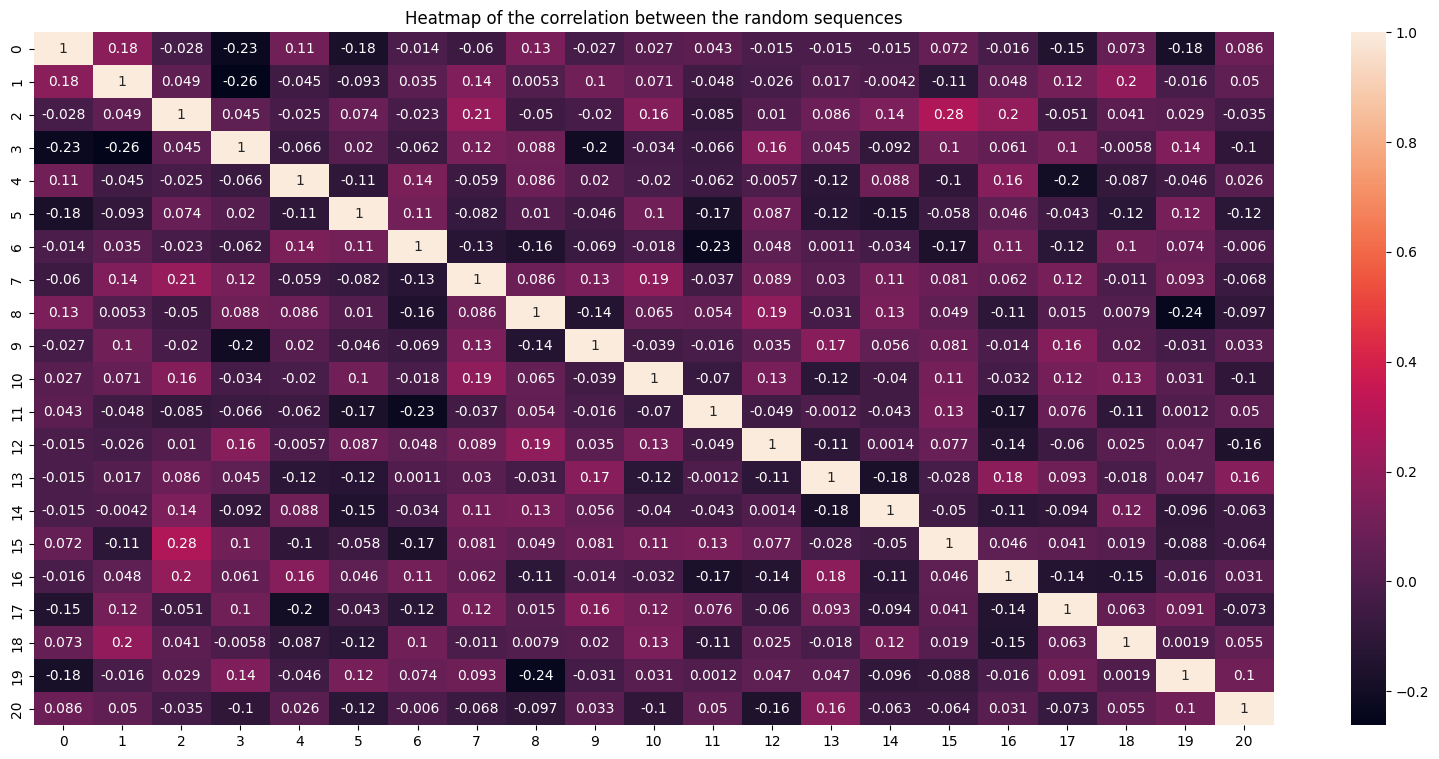

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(20, 9))
# Plot the heatmap again with the specified figure size
ax = sns.heatmap(df_rand.corr(), annot=True)
plt.title("Heatmap of the correlation between the random sequences")
plt.show()